# Capstone 2: Biodiversity Project

## Introduction
This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.
This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.
Here are a few questions that this project has sought to answer:
1. What is the distribution of conservation status for species?
2. Are certain types of species more likely to be of protected status?
3. Are the differences between species and their conservation status significant?
4. What animals are endangered and how often are they observed in parks?


Data sources:
Both Observations.csv and Species_info.csv were provided by Codecademy.com

*Note: The data for this project is inspired by real data, but is mostly fictional.*
### Scoping
It's beneficial to create a project scope whenever a new project is being started. Four sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.
## Project Goals
In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:
1. What is the distribution of conservation status for species?
2. Are certain types of species more likely to be of protected status?
3. Are the differences between species and their conservation status significant?
4. What animals are considered Endangered
5. How often are endangered species observed in parks?

## Data
This project has two data sets that came with the package. The first csv file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project.

## Analysis
In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include:
+ distributions
+ counts
+ relationship between species
+ conservation status of species
+ observations of species in parks

## Evaluation
Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.


# Data
## Import modules
First we import the modules that we'll be using in this assignment:


In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

## Load species data
There are two CSV files. One is `species_info.csv` with data about different species in our National Parks, including:
- The scientific name of each species
- The common names of each species
- The species conservation status

Lets load `species_info.csv` into a DataFrame called `species`

In [2]:
species = pd.read_csv("species_info.csv")

Next we inspect the DataFrame using `.head()`.

In [3]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


We can see the species DataFrame contains 4 columns: category, scientific name, common name and conservation status. 

# Analysis

## Explore species data
Let's start by learning a bit more about our data.  We will answer each of the following questions.

**How many different species are in the `species` DataFrame?**

In [4]:
num_of_species = len(species.scientific_name.unique())
print("The number of unique species is: " + str(num_of_species))

The number of unique species is: 5541


**What are the different values of `category` in `species`?**

In [5]:
cat_vals = species.category.unique()
print("The categories of species are: " + str(cat_vals))

The categories of species are: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


**What are the different values of `conservation_status`?**

In [6]:
con_vals = species.conservation_status.unique()
print("The conservation statuses are: " + str(con_vals))
ordered_status = ["Species of Concern", "Threatened", "In Recovery", "Endangered"]
species['conservation_status'] = pd.Categorical(
    species['conservation_status'], ordered_status, ordered=True
)
#print(species.conservation_status.unique())

The conservation statuses are: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


## Analyzing the protected species data
### 1. What is the distribution of conservation status for species?
Let's start doing some analysis!

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currnetly neither in danger of extinction throughout all or a significant portion of its range

We'd like to count up how many species meet each of these criteria.  We will use `groupby` to count how many `scientific_name` meet each of these criteria.

In [7]:
species.groupby('conservation_status').scientific_name.nunique().reset_index()

,conservation_status,scientific_name
0,Species of Concern,151
1,Threatened,10
2,In Recovery,4
3,Endangered,15


Let's use `plt.bar` to create a bar chart.  First, let's sort the columns by how many species are in each categories.  We can do this using `.sort_values`.  We use the the keyword `by` to indicate which column we want to sort by.

In [8]:
protection_counts = species.groupby('conservation_status')\
    .scientific_name.nunique().reset_index()\
    .sort_values(by='scientific_name')

Now let's create a bar chart!

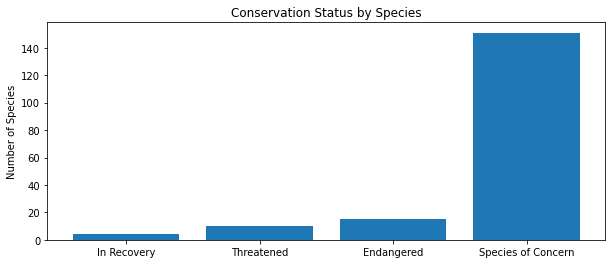

In [9]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
plt.bar(range(len(protection_counts)), protection_counts.scientific_name)
ax.set_xticks(range(len(protection_counts)))
ax.set_xticklabels(protection_counts.conservation_status)
plt.ylabel("Number of Species")
plt.title("Conservation Status by Species")
plt.show()

Let's look more closely with a stacked barchart.
First, we need to group our data by the category and then the conservation status.

In [10]:
protection_counts_by_category = species.groupby(['category', 'conservation_status'])\
    .scientific_name.nunique().reset_index()

protection_counts_by_category = protection_counts_by_category.rename(columns={'scientific_name': 'counts'})
print(protection_counts_by_category)

             category conservation_status  counts
0           Amphibian  Species of Concern       4
1           Amphibian          Threatened       2
2           Amphibian         In Recovery       0
3           Amphibian          Endangered       1
4                Bird  Species of Concern      68
5                Bird          Threatened       0
6                Bird         In Recovery       3
7                Bird          Endangered       4
8                Fish  Species of Concern       4
9                Fish          Threatened       4
10               Fish         In Recovery       0
11               Fish          Endangered       3
12             Mammal  Species of Concern      22
13             Mammal          Threatened       2
14             Mammal         In Recovery       1
15             Mammal          Endangered       6
16  Nonvascular Plant  Species of Concern       5
17  Nonvascular Plant          Threatened       0
18  Nonvascular Plant         In Recovery       0


Now, to the breakdown of the kinds of conservation status versus that category, we need to 'unstack' the conservation status column.

In [11]:
protection_counts_by_category_unstacked = protection_counts_by_category.set_index(['category','conservation_status']).unstack()
print(protection_counts_by_category_unstacked)

                                counts                                  
conservation_status Species of Concern Threatened In Recovery Endangered
category                                                                
Amphibian                            4          2           0          1
Bird                                68          0           3          4
Fish                                 4          4           0          3
Mammal                              22          2           1          6
Nonvascular Plant                    5          0           0          0
Reptile                              5          0           0          0
Vascular Plant                      43          2           0          1


In [12]:
#this is a check for index
print(np.array(protection_counts_by_category_unstacked.iloc[0].values))

[4 2 0 1]


Now for the stacked bar chart itself. Each bar must be plotted seperately, with its starting point being above the previous bar.

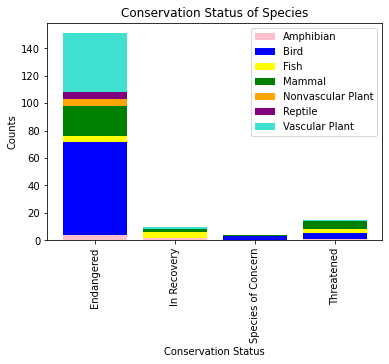

In [13]:
# create data
x = ['Endangered', 'In Recovery', 'Species of Concern', 'Threatened']
y1 = np.array(protection_counts_by_category_unstacked.iloc[0].values)
y2 = np.array(protection_counts_by_category_unstacked.iloc[1].values)
y3 = np.array(protection_counts_by_category_unstacked.iloc[2].values)
y4 = np.array(protection_counts_by_category_unstacked.iloc[3].values)
y5 = np.array(protection_counts_by_category_unstacked.iloc[4].values)
y6 = np.array(protection_counts_by_category_unstacked.iloc[5].values)
y7 = np.array(protection_counts_by_category_unstacked.iloc[6].values)
  
# plot bars in stack manner
plt.bar(x, y1, color='pink')
plt.bar(x, y2, bottom=y1, color='blue')
plt.bar(x, y3, bottom=y1+y2, color='yellow')
plt.bar(x, y4, bottom=y1+y2+y3, color='green')
plt.bar(x, y5, bottom=y1+y2+y3+y4, color='orange')
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color='purple')
plt.bar(x, y7, bottom=y1+y2+y3+y4+y5+y6, color='turquoise')

plt.xlabel("Conservation Status")
plt.xticks(rotation=90)
plt.ylabel("Counts")
plt.legend(['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile', 'Vascular Plant'])
plt.title("Conservation Status of Species")
plt.show()

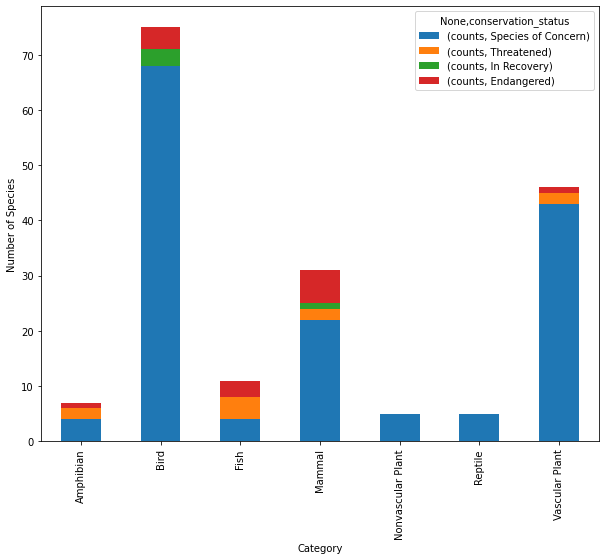

In [14]:
ax = protection_counts_by_category_unstacked.plot(kind = 'bar', figsize=(10,8), 
                               stacked=True)
ax.set_xlabel("Category")
ax.set_ylabel("Number of Species");

### 4. What species are Endangered?
Let's look more closely at the Endangered species specifically. These can be seperated with a boolean expression.

In [15]:
endangered_species = species[species.conservation_status == "Endangered"]
print(endangered_species.head())

   category               scientific_name  \
8    Mammal                   Canis lupus   
9    Mammal                   Canis rufus   
34   Mammal             Myotis grisescens   
39   Mammal                Myotis sodalis   
72   Mammal  Glaucomys sabrinus coloratus   

                                         common_names conservation_status  
8                                           Gray Wolf          Endangered  
9                                            Red Wolf          Endangered  
34                                        Gray Myotis          Endangered  
39              Indiana Bat, Indiana Or Social Myotis          Endangered  
72  Carolina Northern Flying Squirrel, Northern Fl...          Endangered  


In [16]:
print(len(endangered_species))

16


It looks like there are 16 endangered species in the parks. Let's take a look at the category breakdown. The simplest way to visualize this is with a seaborn countplot.

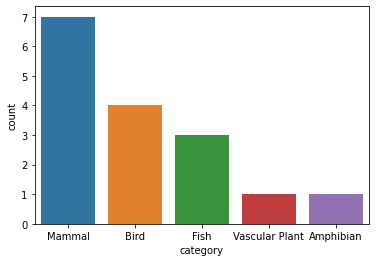

In [17]:
plt.clf()
sns.countplot(data=endangered_species, x="category")
plt.show()

Mammals appear to have the most endangered species listed, followed by birds. Below lets look at unique values so we can see the common names of the individual species.

In [18]:
print(endangered_species.common_names.unique())

['Gray Wolf' 'Red Wolf' 'Gray Myotis'
 'Indiana Bat, Indiana Or Social Myotis'
 'Carolina Northern Flying Squirrel, Northern Flying Squirrel'
 'Whooping Crane' "Bachman's Warbler, Bachman's Wood Warbler"
 'Red-Cockaded Woodpecker' 'Duskytail Darter' 'Smoky Madtom'
 'Mountain Avens, Spreading Avens' 'June Sucker'
 'Sierra Nevada Bighorn Sheep' 'Gray Wolf, Wolf' 'California Condor'
 'Sierra Nevada Yellow-Legged Frog']


# Protected species percentages by category
### 2. Are certain types of species more likely to be of protected status?

Let's create a new column in `species` called `is_protected`, which is `True` if `conservation_status` is not equal to NaN (or null), and `False` otherwise.

In [19]:
species['is_protected'] = species.conservation_status.notnull()

Next we will group the `species` data frame by the `category` and `is_protected` columns and count the unique `scientific_name`s in each grouping.

We will save our results to `category_counts`.

In [20]:
category_counts = species.groupby(['category', 'is_protected'])\
                         .scientific_name.nunique().reset_index()

Now we examine `category_counts` using `head()`.

In [21]:
print(category_counts.head())

    category  is_protected  scientific_name
0  Amphibian         False               72
1  Amphibian          True                7
2       Bird         False              413
3       Bird          True               75
4       Fish         False              115


It's going to be easier to view this data if we pivot it.  Using `pivot`, we will rearange `category_counts` so that:
- `columns` is `is_protected`
- `index` is `category`
- `values` is `scientific_name`

We will save our pivoted data to `category_pivot`. 

In [22]:
category_pivot = category_counts.pivot(columns="is_protected", index="category", values="scientific_name").reset_index()

Examine `category_pivot`.

In [23]:
print(category_pivot.head())

is_protected           category  False  True
0                     Amphibian     72     7
1                          Bird    413    75
2                          Fish    115    11
3                        Mammal    146    30
4             Nonvascular Plant    328     5


To make it more readable, we will use the `.columns` property to  rename the categories `True` and `False` to something more descriptive:
- Leave `category` as `category`
- Rename `False` to `not_protected`
- Rename `True` to `protected`

In [24]:
category_pivot.columns = ['category', 'not_protected', 'protected']

Let's create a new column of `category_pivot` called `percent_protected`, which is equal to `protected` (the number of species that are protected) divided by `protected` plus `not_protected` (the total number of species).

In [25]:
category_pivot["percent_protected"] = category_pivot.protected/(category_pivot.protected + category_pivot.not_protected)

Now we can examine `category_pivot`.

In [26]:
print(category_pivot.head())

            category  not_protected  protected  percent_protected
0          Amphibian             72          7           0.088608
1               Bird            413         75           0.153689
2               Fish            115         11           0.087302
3             Mammal            146         30           0.170455
4  Nonvascular Plant            328          5           0.015015


Let's make some pie chart visualizations of those percentages we found.

In [27]:
#seperate series for each category in prep for pie chart 

amphibian_counts = category_pivot.iloc[[0], [1, 2]]
bird_counts = category_pivot.iloc[[1], [1, 2]]
fish_counts = category_pivot.iloc[[2], [1, 2]]
mammal_counts = category_pivot.iloc[[3], [1, 2]]
plant_counts = category_pivot.iloc[[4], [1, 2]]

#check that each series looks correct
print(amphibian_counts)

   not_protected  protected
0             72          7


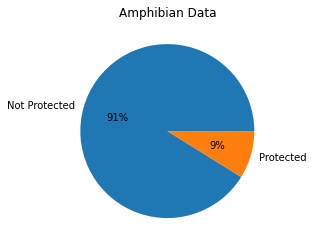

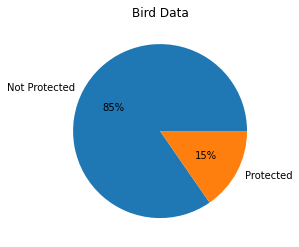

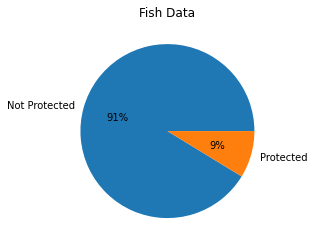

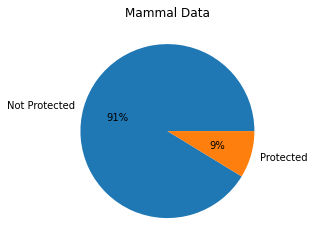

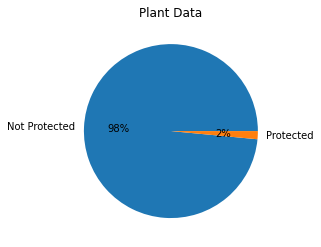

In [28]:
#pie charts for each category to follow 

amphibian_data = [72, 7]
plt.clf()
plt.pie(amphibian_data, labels=["Not Protected", "Protected"], autopct='%.0f%%')
plt.title("Amphibian Data")
plt.show()

bird_data = [413, 75]
plt.clf()
plt.pie(bird_data, labels=["Not Protected", "Protected"], autopct='%.0f%%')
plt.title("Bird Data")
plt.show()

fish_data = [115, 11]
plt.clf()
plt.pie(fish_data, labels=["Not Protected", "Protected"], autopct='%.0f%%')
plt.title("Fish Data")
plt.show()

mammal_data = [146, 30]
plt.clf()
plt.pie(fish_data, labels=["Not Protected", "Protected"], autopct='%.0f%%')
plt.title("Mammal Data")
plt.show()

plant_data = [328, 5]
plt.clf()
plt.pie(plant_data, labels=["Not Protected", "Protected"], autopct='%.0f%%')
plt.title("Plant Data")
plt.show()

# Hypothesis / Chi-square testing
### 3. Are the differences between species and their conservation status significant?

It looks like species in category `Mammal` are more likely to be endangered than species in `Bird`.  We're going to do a significance test to see if this statement is true.  Before we do the significance test, we should consider the following questions:
- Is the data numerical or categorical?
- How many pieces of data are we comparing?

Based on those answers, we should choose to do a *chi squared test*.  In order to run a chi squared test, we'll need to create a contingency table.  Our contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

We will create a table called `contingency` and fill it in with the correct numbers. The p-value will tell us whether the relation between category and conservation status are significant. We will use the standard threshold of 5%.

First, out of curiousity, we can compare all the categories at once. We will create a contingency table `Xtab` and run the chi2-contingency test.

In [29]:
Xtab = pd.crosstab(species.category, species.is_protected)
print(Xtab)
chi2, pval, dof, exp = chi2_contingency(Xtab)
print(pval)

is_protected       False  True 
category                       
Amphibian             73      7
Bird                 442     79
Fish                 116     11
Mammal               176     38
Nonvascular Plant    328      5
Reptile               74      5
Vascular Plant      4424     46
3.095911909904608e-98


Comparing all categories, the difference is not significant. We can look closer by comparing just two at a time.

**Is the difference between bird and mammal significant?** We will compare just birds and mammals with `contingency`.

In [30]:
contingency = [[30, 146],
              [75, 413]]

Now we run `chi2_contingency` with `contingency`.

In [32]:
chi2, pval, dof, exp = chi2_contingency(contingency)
print(pval)

0.6875948096661336


It looks like this difference isn't significant!

Let's test another.  **Is the difference between `Reptile` and `Mammal` significant?**

In [33]:
contingency2 = [[30, 146],
               [5, 73]]
chi2, pval, dof, exp = chi2_contingency(contingency2)
print(pval)

0.03835559022969898


Yes! It looks like there is a significant difference between `Reptile` and `Mammal`!

## Observation Data
### 5. How often are endangered species observed in parks?

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [34]:
observations = pd.read_csv("observations.csv")

There were a couple of wolves in the data for endangered animals above. Lets look just at wolf observations.

We start by using `apply` and a `lambda` function to create a new column in `species` called `is_wolf` which is `True` if the `common_names` contains `'Wolf'`, and `False` otherwise.

In [35]:
species['is_wolf'] = species.common_names.apply(lambda x: 'Wolf' in x)
species.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_wolf
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,False,False
1,Mammal,Bos bison,"American Bison, Bison",NaN,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN,False,False


We will select the rows of `species` where `is_wolf` is `True` and examine the results.

In [36]:
species[species.is_wolf]

,category,scientific_name,common_names,conservation_status,is_protected,is_wolf
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True,True
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery,True,True
3785,Vascular Plant,Symphoricarpos occidentalis,"Western Snowberry, Wolfberry",NaN,False,True
3993,Vascular Plant,Euphorbia esula,"Leafy Spurge, Spurge, Wolf's Milk, Wolf's-Milk",NaN,False,True
4020,Vascular Plant,Salix wolfii var. idahoensis,Wolf's Willow,NaN,False,True
4288,Vascular Plant,Trisetum wolfii,"Wolf Trisetum, Wolf's Trisetum",NaN,False,True
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,True,True


A few of the results are actually plants.  Select the rows of `species` where `is_wolf` is `True` and `category` is `Mammal`.  We will save the results to the variable `wolf_species`.

In [37]:
wolf_species = species[(species.is_wolf) & (species.category == 'Mammal')]
wolf_species

,category,scientific_name,common_names,conservation_status,is_protected,is_wolf
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True,True
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery,True,True
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,True,True


Now we merge `wolf_species` with `observations` to get a DataFrame with observations of wolves. We will save this DataFrame as `wolf_observations`.

In [38]:
wolf_observations = observations.merge(wolf_species)
wolf_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_wolf
0,Canis rufus,Bryce National Park,30,Mammal,Red Wolf,Endangered,True,True
1,Canis rufus,Yosemite National Park,34,Mammal,Red Wolf,Endangered,True,True
2,Canis rufus,Great Smoky Mountains National Park,13,Mammal,Red Wolf,Endangered,True,True
3,Canis rufus,Yellowstone National Park,60,Mammal,Red Wolf,Endangered,True,True
4,Canis lupus,Yosemite National Park,35,Mammal,Gray Wolf,Endangered,True,True
5,Canis lupus,Yosemite National Park,35,Mammal,"Gray Wolf, Wolf",In Recovery,True,True
6,Canis lupus,Yosemite National Park,35,Mammal,"Gray Wolf, Wolf",Endangered,True,True
7,Canis lupus,Bryce National Park,27,Mammal,Gray Wolf,Endangered,True,True
8,Canis lupus,Bryce National Park,27,Mammal,"Gray Wolf, Wolf",In Recovery,True,True
9,Canis lupus,Bryce National Park,27,Mammal,"Gray Wolf, Wolf",Endangered,True,True


**How many total wolf observations (across all three species) were made at each national park?**
We will use `groupby` to get the `sum` of `observations` for each `park_name`.  We will save this answer to `obs_by_park`.

This is the total number of wolves observed in each park over the past 7 days.

In [39]:
obs_by_park = wolf_observations.groupby('park_name').observations.sum().reset_index()
obs_by_park

,park_name,observations
0,Bryce National Park,420
1,Great Smoky Mountains National Park,190
2,Yellowstone National Park,1050
3,Yosemite National Park,622


Let's create a bar chart showing the different number of observations per week at each park.

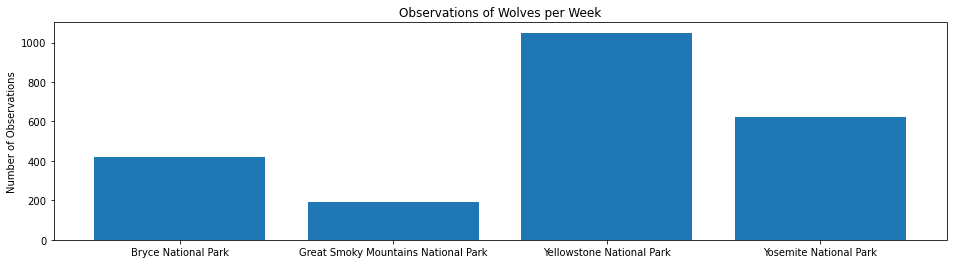

In [40]:
plt.figure(figsize=(16, 4))
ax = plt.subplot()
plt.bar(range(len(obs_by_park)),
        obs_by_park.observations.values)
ax.set_xticks(range(len(obs_by_park)))
ax.set_xticklabels(obs_by_park.park_name.values)
plt.ylabel('Number of Observations')
plt.title('Observations of Wolves per Week')
plt.show()

Let's use seaborn so we can see wolf species breakdowns. First, we need to do another `.groupby` to add the additional scientific name categorization.

In [41]:
obs_by_park_and_species = wolf_observations.groupby(['park_name', 'scientific_name']).observations.sum().reset_index()
obs_by_park_and_species

,park_name,scientific_name,observations
0,Bryce National Park,Canis lupus,390
1,Bryce National Park,Canis rufus,30
2,Great Smoky Mountains National Park,Canis lupus,177
3,Great Smoky Mountains National Park,Canis rufus,13
4,Yellowstone National Park,Canis lupus,990
5,Yellowstone National Park,Canis rufus,60
6,Yosemite National Park,Canis lupus,588
7,Yosemite National Park,Canis rufus,34


Now we can plot this information. With seaborn, we can add an argument `hue` to see the species side by side.

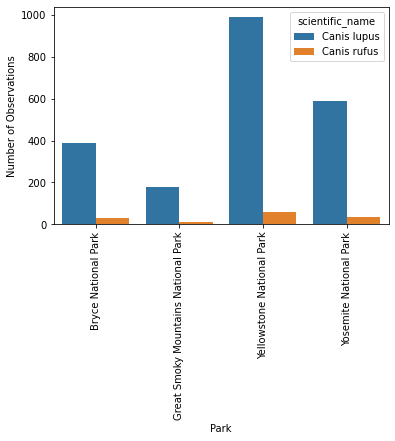

In [42]:
plt.clf()
sns.barplot(data=obs_by_park_and_species, x="park_name", y="observations", hue="scientific_name")
plt.xticks(rotation=90)
plt.xlabel("Park")
plt.ylabel("Number of Observations")
plt.show()

# Conclusions
## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

1. What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation. (5,633 vs 191)
2. Are certain types of species more likely to be of protected status?
    - Mammals and Birds had the highest percentage of being of protected status.
3. Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
4. Which animals are Endangered and how often are they observed in parks?
    - There were 16 animals listed as Endangered status, among those were two types of wolves. Both species of wolves were most often observed in the Yellowstone National Park.


# Further Research

The observational data was limited to one week. For more complete analysis, it would be neccessary to have data that spans a longer amount of time. Utilizing google search, the size differences of these national parks are significant (Yellowstone is 8th largest, followed by Yosemite at 16th, Great Smokey at 19th, and Bryce at 51st). Those size differences may affect the observational data. Additional data indicated precise locations of sightings would be interesting to map for visualizations.